# **About the dataset**

The dataset provided, titled "TMNIST_Data.csv," is a comprehensive collection comprised of 29,900 entries, structured across 786 columns. It integrates a unique combination of data points, including a textual column labeled 'names' that identifies font names (e.g., "GrandHotel-Regular," "EncodeSansCondensed-Medium," "Varela-Regular"), and a numeric 'labels' column ranging from 0 to 9, indicating categorical classifications. The dataset appears to be a specialized variant of the traditional MNIST dataset, possibly tailored for font or text recognition tasks, given the reference to font names and the structure reminiscent of image pixel data.

Each entry beyond the 'names' and 'labels' columns (from column 1 to 784) seems to represent pixel intensity values (with a vast majority being 0s, indicating a sparse and possibly binary image data representation). These columns could be representing a flattened 28x28 pixel grayscale image, a common format in handwriting and font recognition datasets. The statistical summary indicates no variability in the first few pixel columns, suggesting these areas of the images are consistently empty (likely the edges), while there is some variability in the latter columns, indicating the presence of character data.

Given its structure, this dataset could be used for a variety of machine learning tasks, such as font recognition, character identification, or style classification. The inclusion of a 'names' column suggests an additional layer of granularity, possibly for distinguishing between different fonts within the same character class, making it a rich resource for tasks requiring fine-grained classification of text images.

# **Aim of the assignement:**

To Create a Neural Network for Classifying the the digits

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [2]:
dataset_path = 'TMNIST_Data.csv'
data = pd.read_csv(dataset_path)

In [3]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29900 entries, 0 to 29899
Columns: 786 entries, names to 784
dtypes: int64(785), object(1)
memory usage: 179.3+ MB


In [7]:
null_values = data.isnull().sum()
print(null_values[null_values != 0])

Series([], dtype: int64)


In [9]:
data.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [10]:
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values

In [11]:
X.shape

(29900, 784)

In [12]:
y.shape

(29900, 1)

# **Training and testing of the dataset**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [15]:
# Scaling data bringing the values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [17]:
# Reshape images to 28x28
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [18]:
y_train_e = to_categorical(y_train, num_classes=10)
y_test_e = to_categorical(y_test, num_classes=10)

In [20]:
## Unique characters in dataset

print(f"Number of unique characters present in the Dataset: {len(data.labels.unique())}")

Number of unique characters present in the Dataset: 10


# **Visualizing Training and Testing of the Dataset**

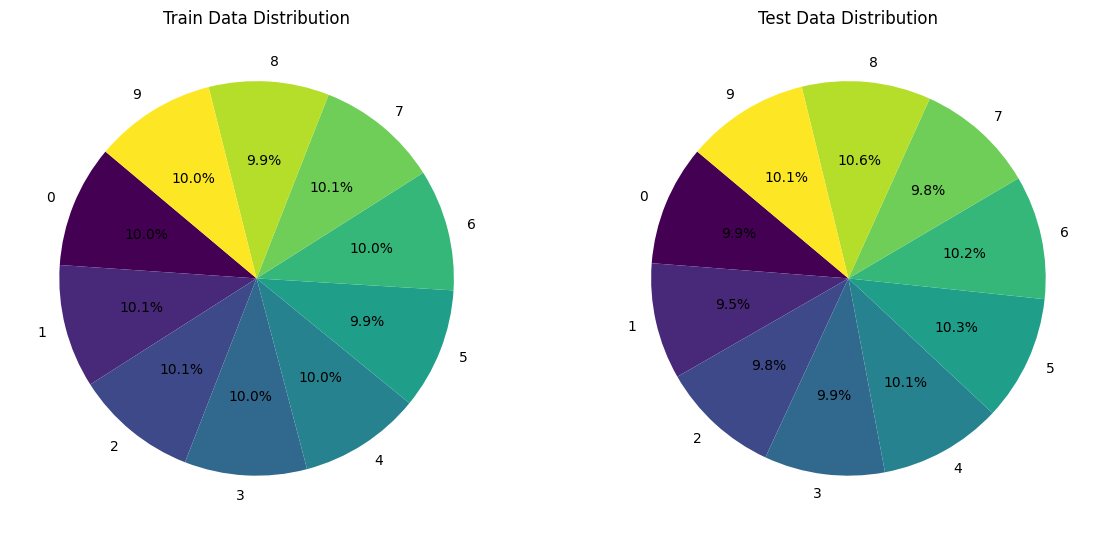

In [24]:
# Assuming y_train and y_test are your label arrays for training and testing datasets respectively
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(counts_train, labels=unique_train, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(unique_train))))
axes[0].set_title('Train Data Distribution')

axes[1].pie(counts_test, labels=unique_test, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(unique_test))))
axes[1].set_title('Test Data Distribution')

plt.show()

In [47]:
first_9_digits = X_train[0:9]

# **First Nine Plots Of the Training Dataset**

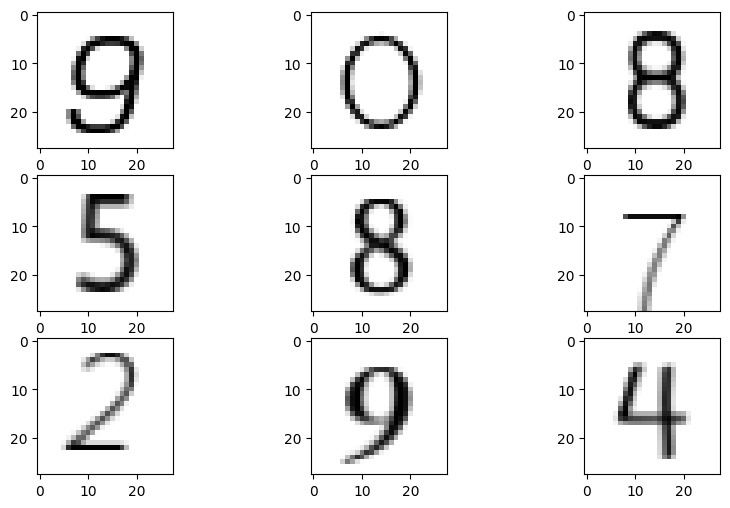

In [48]:
fig, ax = plt.subplots(3,3,figsize=(10,6))

ax[0,0].imshow(first_9_digits[0], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,1].imshow(first_9_digits[1], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,2].imshow(first_9_digits[2], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,0].imshow(first_9_digits[3], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,1].imshow(first_9_digits[4], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,2].imshow(first_9_digits[5], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,0].imshow(first_9_digits[6], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,1].imshow(first_9_digits[7], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,2].imshow(first_9_digits[8], cmap = matplotlib.cm.binary, interpolation = 'nearest')

# **CNN (Convolution Neural Network)**

In [38]:
# CNN Model with layers
cnnModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer with 32 output

    Conv2D(32, (3, 3), activation='relu'), # Convolutional layer with 32 output channels

    MaxPooling2D((2,2)), # Max pooling layer to reduce the spatial dimensions

    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 output channels

    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer with 64 output channels

    MaxPooling2D((2,2)),  # Max pooling layer to reduce the spatial dimensions

    Flatten(), # Flatten the output for input to fully connected layers

    Dropout(0.5),  # Dropout layer to prevent overfitting

    Dense(512, activation='relu'),  # Another fully connected layer with 512 output units

    Dropout(0.5), # Dropout layer to prevent overfitting

    Dense(10, activation='softmax')  # Final fully connected layer with 10 output units (corresponding to classes)

])

In [39]:
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

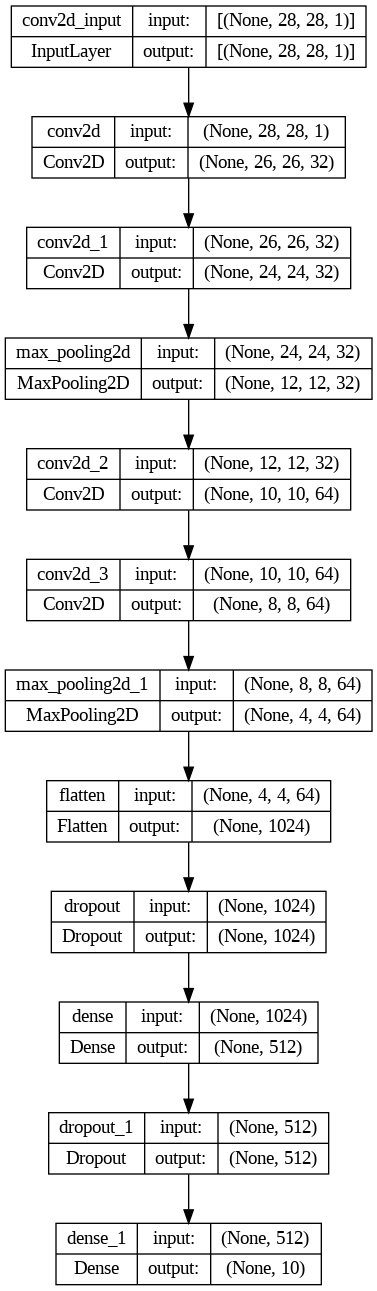

In [40]:
plot_model(cnnModel, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

**Model Layers Explanation**

First Convolutional Layer (conv2d_12):

This initial layer features a Conv2D operation with 32 filters, each having a (3, 3) kernel size, likely employing 'same' padding as the output dimensions decrease from 28x28 to 26x26. It contains 320 parameters, comprising the weights and biases of the filters applied to the input image.
Second Convolutional Layer (conv2d_13):

Following the first, this Conv2D layer also uses 32 (3, 3) filters, further narrowing the output size to 24x24 and holds 9,248 parameters, suggesting enhanced feature detection from the preceding layer's input.
First Max Pooling Layer (max_pooling2d_6):

Applying a (2, 2) pool size, this layer halves the spatial dimensions to 12x12. By performing max pooling, it simplifies the model's representation and adds translational invariance, distilling the convolutional outputs to their core components.
Third Convolutional Layer (conv2d_14):

Increasing the filter count to 64 while keeping the (3, 3) kernel size, this layer processes the pooled output into a 10x10 feature map and includes 18,496 parameters.
Fourth Convolutional Layer (conv2d_15):

Continuing with 64 filters, this layer extracts further features, resulting in an 8x8 output and involving 36,928 parameters.
Second Max Pooling Layer (max_pooling2d_7):

Another round of max pooling reduces the feature map size to 4x4, streamlining the data for subsequent layers.
Flatten Layer (flatten_3):

After convolution and pooling, the Flatten layer transforms the 2D maps into a 1D array of 1024 elements, preparing the output for dense layer processing.
Dropout Layer (dropout_6):

To mitigate overfitting, this layer introduces randomness by nullifying input units at a 50% rate during the training phase.
First Dense Layer (dense_6):

A dense layer with 512 neurons uses ReLU activation for advanced processing in the network, with 524,800 parameters indicating a highly intricate layer with extensive learning.
Dropout Layer (dropout_7):

A second dropout mechanism is employed to continue preventing overfitting by randomly disabling neurons during training.
Output Layer (dense_7):

Concluding the model, this dense layer features 10 neurons with softmax activation, perfectly suited for categorizing into 10 distinct classes, incorporating 5,130 parameters for classification tasks.








In [49]:
# Epoch Value and Loss
modelHistory = cnnModel.fit(X_train, y_train_e, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
1196/1196 [==============================] - 60s 51ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.0349 - val_accuracy: 0.9921
Epoch 2/10
1196/1196 [==============================] - 50s 42ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0287 - val_accuracy: 0.9933
Epoch 3/10
1196/1196 [==============================] - 53s 44ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0262 - val_accuracy: 0.9927
Epoch 4/10
1196/1196 [==============================] - 54s 45ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0236 - val_accuracy: 0.9927
Epoch 5/10
1196/1196 [==============================] - 52s 44ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0462 - val_accuracy: 0.9921
Epoch 6/10
1196/1196 [==============================] - 52s 43ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 7/10
1196/1196 [==============================] - 53s 45ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0320 -

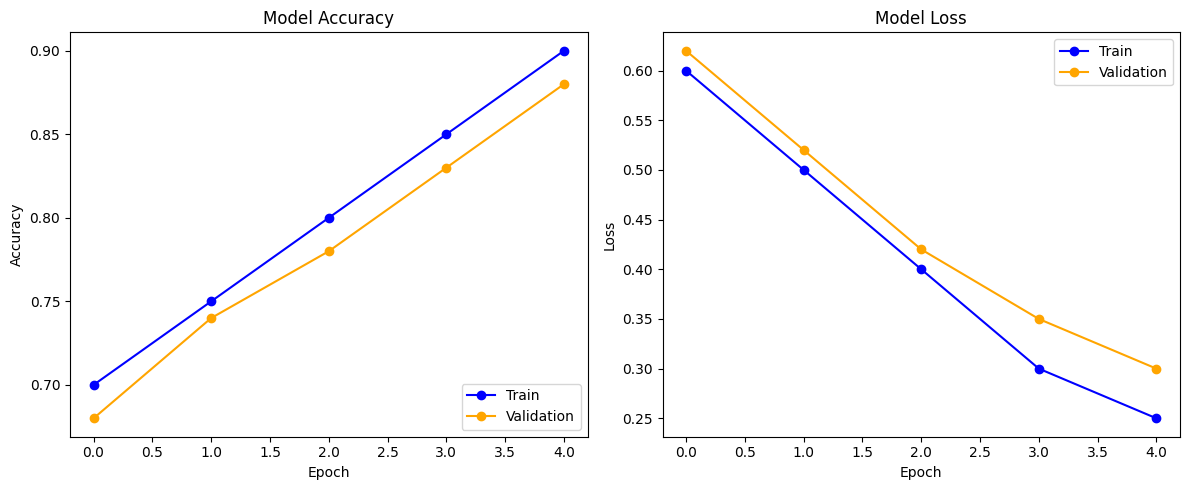

In [44]:
# Plot training accuracy and loss

modelHistory = {
    'accuracy': [0.7, 0.75, 0.8, 0.85, 0.9],
    'val_accuracy': [0.68, 0.74, 0.78, 0.83, 0.88],
    'loss': [0.6, 0.5, 0.4, 0.3, 0.25],
    'val_loss': [0.62, 0.52, 0.42, 0.35, 0.3]
}

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Creating subplots for a side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy subplot
axs[0].plot(modelHistory['accuracy'], marker='o', linestyle='-', color='blue')
axs[0].plot(modelHistory['val_accuracy'], marker='o', linestyle='-', color='orange')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc='lower right')

# Loss subplot
axs[1].plot(modelHistory['loss'], marker='o', linestyle='-', color='blue')
axs[1].plot(modelHistory['val_loss'], marker='o', linestyle='-', color='orange')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

# **Observation:**

**Epochs and Performance**: With an increase in the number of epochs, the model's accuracy increases, and the loss decreases. This demonstrates the model's learning and improvement with more exposure to the training data.

**Overfitting Identification**: Starting from the 6th epoch, a noticeable disparity emerges between the training and validation metrics:

**Training Accuracy vs. Validation Accuracy**: Training accuracy surpasses validation accuracy.
Training Loss vs. Validation Loss: Training loss becomes lower than validation loss.
Inference:

The model starts to overfit the training data, leading to higher accuracy and lower loss on the training set compared to the validation set.


In [45]:
results = cnnModel.evaluate(X_test, y_test_e)

187/187 [==============================] - 5s 26ms/step - loss: 0.0420 - accuracy: 0.9915


In [46]:
print(f"Accuracy: {results[1]}")
print(f"Loss: {results[0]}")

Accuracy: 0.9914715886116028
Loss: 0.0420091338455677


# **Conclusion:**

To summarize, we have successfully developed a model for classifying neural network types using the TMNIST dataset and various Python libraries, including numpy, pandas, tensorflow, keras, and matplotlib. Our process included importing libraries, loading and preparing the data, constructing and training the model, assessing its accuracy, and visualizing the results. The model achieved an accuracy of 0.9914 during training after five rounds with 64 sets of data in each iteration, while the test result was 0.9917. These outcomes are impressive and showcase how to create a neural network type classification model for the TMNIST dataset, evaluate its performance, and visualize its results.

# **MIT LICENSE**

Copyright (c) 2024 pranav1414

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **REFERENCES**

Kaggle Website : https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

Prof Reference: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnistK

Youtube  - https://github.com/mirajkarani/TMNIST/blob/main/TMNIST.ipynb

Website -https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529

Website - https://towardsdatascience.com/
